In [713]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import neighbors, datasets
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.model_selection import train_test_split
%matplotlib inline

In [714]:
#General information and tuning

In [760]:
data = pd.read_csv('train.csv') #download data

In [761]:
data.head() #first 5 row of data

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN      8370  
1                 6.0                14.0     15200  
2                 NaN                 NaN      1422  
3                14.0                 NaN      1057  
4                 NaN                 NaN      7969

In [762]:
data.shape

(550068, 12)

In [763]:
data.info() #information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [783]:
#fillna with zero: Product_Categories have to be in equal format
data_for_product = data.fillna(value=0) 

In [784]:
#change type of data
data_for_product['Product_Category_2'] = data_for_product['Product_Category_2'].astype(int)
data_for_product['Product_Category_3'] = data_for_product['Product_Category_3'].astype(int)

In [785]:
data_for_product.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                   0                   0      8370  
1                   6                  14     15200  
2                   0                   0      1422  
3                  14                   0      1057  
4                   0                   0      7969

In [767]:
data_for_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            550068 non-null int64
Product_Category_3            550068 non-null int64
Purchase                      550068 non-null int64
dtypes: int64(7), object(5)
memory usage: 50.4+ MB


## Gender's investigation

In [777]:
('There are {} women and {} men in the Black Friday dataset. Men quantity exceed women in {} times'
 .format(sum(data.Gender == 'F'), sum(data.Gender == 'M'), round(sum(data.Gender == 'M')/sum(data.Gender == 'F'))))

'There are 135809 women and 414259 men in the Black Friday dataset. Men quantity exceed women in 3 times'

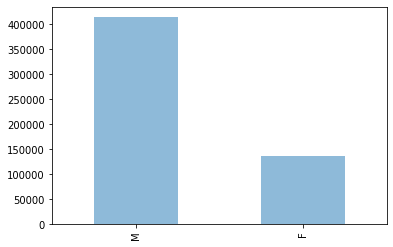

In [778]:
('There are {} women and {} men in the Black Friday dataset'.format(sum(data.Gender == 'F'),sum(data.Gender == 'M')))

data['Gender'].value_counts().plot(kind='bar', alpha=0.5)
plt.show()

## Product category investigation

In [780]:
#group products categories
products_1cat = data_for_product[data_for_product['Product_Category_1'] 
                                 > 0].groupby('Product_ID')['Product_Category_1'].sum().reset_index().sort_values(by='Product_Category_1', ascending=False).head(10)

products_2cat = data_for_product[data_for_product['Product_Category_2'] 
                                 > 0].groupby('Product_ID')['Product_Category_2'].sum().reset_index().sort_values(by='Product_Category_2', ascending=False).head(10)

products_3cat = data_for_product[data_for_product['Product_Category_3'] 
                                 > 0].groupby('Product_ID')['Product_Category_3'].sum().reset_index().sort_values(by='Product_Category_3', ascending=False).head(10)

In [781]:
best_1cat = products_1cat.rename(columns={'Product_ID': 'Product_Category1_ID'}).reset_index(drop=True)
best_2cat = products_2cat.rename(columns={'Product_ID': 'Product_Category2_ID'}).reset_index(drop=True)
best_3cat = products_3cat.rename(columns={'Product_ID': 'Product_Category3_ID'}).reset_index(drop=True)                         

In [782]:
all_categories = pd.concat([best_1cat, best_2cat, best_3cat], axis=1, sort=False)
all_categories

Product_Category1_ID  Product_Category_1 Product_Category2_ID  \
0            P00255842               22128            P00058042   
1            P00371644               17980            P00057642   
2            P00372445               16740            P00051442   
3            P00375436               16280            P00237542   
4            P00370853               15542            P00117942   
5            P00370293               14915            P00220442   
6            P00058042               11376            P00044442   
7            P00071442               11055            P00114942   
8            P00111742               10335            P00117442   
9            P00051442                9992            P00034742   

   Product_Category_2 Product_Category3_ID  Product_Category_3  
0               22752            P00184942               24480  
1               22050            P00057642               23520  
2               21233            P00010742               22950  
3               20910            P00059442               22496  
4               20460            P00237542               22304  
5               17948            P00112142               21868  
6               17776            P00046742               21570  
7               17670            P00034742               20604  
8               17640            P00114942               18848  
9               16968            P00270942               17280

## City/Occupation investigation

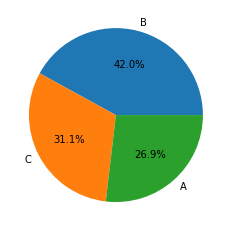

In [729]:
plt.pie(data['City_Category'].value_counts(),labels=['B', 'C', 'A'],autopct='%1.1f%%')
plt.show()

## User's data

In [730]:
data.groupby(['Age']).groups.keys()

dict_keys(['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'])

In [731]:
data_unique_user = data.groupby('User_ID').count().sort_values(by='Product_ID',ascending=False)
data_unique_user.count()

Product_ID                    5891
Gender                        5891
Age                           5891
Occupation                    5891
City_Category                 5891
Stay_In_Current_City_Years    5891
Marital_Status                5891
Product_Category_1            5891
Product_Category_2            5891
Product_Category_3            5891
Purchase                      5891
dtype: int64

## KNeighborsClassifier
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [758]:
data_for_nn = data.fillna(value=0)

In [768]:
data_for_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            550068 non-null int64
Product_Category_3            550068 non-null int64
Purchase                      550068 non-null int64
dtypes: int64(7), object(5)
memory usage: 50.4+ MB


### Featuring data_v1
Product_ID,	User_ID, Purchase - has to be deleted, its unuque items

Data for KNN

Gender - Estimated as a target in this case

Age - must be replaced by integers (numbers of categories)

Occupation - int

City_Category - A,B,C

Stay_In_Current_City_Years - int

Marital_Status - int (1,0)

Product_Category_1,2,3 - int

In [769]:
X = data_for_product.drop(columns=['User_ID', 'Gender', 'Product_ID','Purchase']) #drop NaN

#replace age categories to digits
X["Age"] = X['Age'].replace({'0-17': 1, '18-25': 2, '26-35': 3, '36-45':
                             4, '46-50': 5, '51-55': 6, '55+ ': 7, '55+': 7})
X["City_Category"] = X['City_Category'].replace({'A': 1, 'B': 2, 'C': 3})
X["Stay_In_Current_City_Years"] = X['Stay_In_Current_City_Years'].replace({'4+': 4})

X.head(3)

Age  Occupation  City_Category Stay_In_Current_City_Years  Marital_Status  \
0    1          10              1                          2               0   
1    1          10              1                          2               0   
2    1          10              1                          2               0   

   Product_Category_1  Product_Category_2  Product_Category_3  
0                   3                   0                   0  
1                   1                   6                  14  
2                  12                   0                   0

In [770]:
#Estimate Gender as a target

In [772]:
target = data_for_product['Gender'].values
target[10:25]

array(['M', 'M', 'M', 'M', 'F', 'F', 'F', 'F', 'M', 'M', 'M', 'M', 'M',
       'M', 'M'], dtype=object)

In [775]:
X_train, X_test, target_train, target_test = train_test_split(X, target, test_size=0.3, 
                                                              random_state=1, stratify=target)

In [774]:
KNN = KNeighborsClassifier(n_neighbors=10)
KNN.fit(X_train, target_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [776]:
KNN.score(X_test, target_test)

0.8109573933014586

In [743]:
KNN.predict(X_test)

array(['F', 'M', 'M', ..., 'M', 'M', 'M'], dtype=object)

### Featuring data_v2
Product_ID,	User_ID - has to be deleted, its unuque items

Data for KNN

Gender - Estimated as a target in this case

Age - must be replaced by integers (numbers of categories)

Occupation - int

City_Category - A,B,C

Stay_In_Current_City_Years - int

Marital_Status - int (1,0)

Product_Category  - sum of all categories(1,2,3) - int

Purchase - must be changed, overwise it can influence on model 

In [786]:
X2 = data_for_product.drop(columns=['User_ID', 'Gender', 'Product_ID']) #drop NaN

#replace
X2["Age"] = X2['Age'].replace({'0-17': 1, '18-25': 2, '26-35': 3, '36-45':
                             4, '46-50': 5, '51-55': 6, '50+ ': 7, '55+': 7})
X2["City_Category"] = X2['City_Category'].replace({'A': 1, 'B': 2, 'C': 3})
X2["Stay_In_Current_City_Years"] = X2['Stay_In_Current_City_Years'].replace({'4+': 4})
X2['Purchase'] = np.log(X2['Purchase'])
X2['Products'] = X2['Product_Category_1']+ X2['Product_Category_2'] + X2['Product_Category_3']

X2.drop(columns = ['Product_Category_1', 'Product_Category_2','Product_Category_3'], inplace=True)
X2.head(3)

Age  Occupation  City_Category Stay_In_Current_City_Years  Marital_Status  \
0    1          10              1                          2               0   
1    1          10              1                          2               0   
2    1          10              1                          2               0   

   Purchase  Products  
0  9.032409         3  
1  9.629051        21  
2  7.259820        12

In [787]:
X2_train, X2_test, target_train, target_test = train_test_split(X2, target, test_size=0.3, 
                                                              random_state=1, stratify=target)

In [788]:
KNN2 = KNeighborsClassifier(n_neighbors=10)
KNN2.fit(X2_train, target_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [789]:
KNN2.score(X2_test, target_test)

0.8283672987074372

### Featuring data_v3
Lets merge User's purchases! 

Data for KNN

Gender - Estimated as a target in this case

Age - must be replaced by integers (numbers of categories)

Occupation - int

City_Category - A,B,C

Stay_In_Current_City_Years - int

Marital_Status - int (1,0)

Product_Category  - sum of all categories(1,2,3) - int

In [790]:
data_unique_id = data_for_product[['User_ID','Gender','Age', 'City_Category', 
                              'Occupation', 'Stay_In_Current_City_Years', 'Marital_Status']]
data_unique_id = data_unique_id.groupby('User_ID').first().reset_index()

In [791]:
dict_users = data_for_product[['User_ID','Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']]
dict_users = dict_users.groupby('User_ID').agg(lambda x: x.sum()).reset_index()

In [792]:
set_for_X3 = dict_users.merge(data_unique_id,on='User_ID')

In [793]:
set_for_X3.head()

User_ID  Product_Category_1  Product_Category_2  Product_Category_3  \
0  1000001                 213                 132                 148   
1  1000002                 354                 539                 359   
2  1000003                  93                 117                 148   
3  1000004                  33                 102                 127   
4  1000005                 659                 642                 207   

   Purchase Gender    Age City_Category  Occupation  \
0    334093      F   0-17             A          10   
1    810472      M    55+             C          16   
2    341635      M  26-35             A          15   
3    206468      M  46-50             B           7   
4    821001      M  26-35             A          20   

  Stay_In_Current_City_Years  Marital_Status  
0                          2               0  
1                         4+               0  
2                          3               0  
3                          2               1  
4                          1               1

In [794]:
X3 = set_for_X3.drop(columns=['User_ID', 'Gender']) 

#replace
X3["Age"] = X3['Age'].replace({'0-17': 1, '18-25': 2, '26-35': 3, '36-45':
                             4, '46-50': 5, '51-55': 6, '50+ ': 7, '55+': 7})
X3["City_Category"] = X3['City_Category'].replace({'A': 1, 'B': 2, 'C': 3})
X3["Stay_In_Current_City_Years"] = X3['Stay_In_Current_City_Years'].replace({'4+': 4})
X3['Purchase'] = np.log2(X3['Purchase'])



target3 = set_for_X3['Gender'].values

In [795]:
X3.head(3)

Product_Category_1  Product_Category_2  Product_Category_3   Purchase  Age  \
0                 213                 132                 148  18.349890    1   
1                 354                 539                 359  19.628403    7   
2                  93                 117                 148  18.382096    3   

   City_Category  Occupation Stay_In_Current_City_Years  Marital_Status  
0              1          10                          2               0  
1              3          16                          4               0  
2              1          15                          3               0

In [796]:
X3_train, X3_test, target3_train, target3_test = train_test_split(X3, target3, test_size=0.3, 
                                                              random_state=1, stratify=target3)

In [797]:
KNN3 = KNeighborsClassifier(n_neighbors=10)
KNN3.fit(X3_train, target3_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [798]:
KNN3.score(X3_test, target3_test)

0.6815610859728507

Conclusion:
Despite of the fact that data has processed more accurate, resalts are worse than with the set with a data with all purchases (not only unique)